In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

pd.set_option('display.max_columns', 50)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

中心极限定理：对于均值为mu，标准差为theta的总体，其抽样分布的均值将服从均值为mu，标准差为delta^2/mu的正态分布

In [3]:
df = pd.read_stata('cgss样本.dta')
def fre(series):
    tabulate=pd.concat([series.value_counts(),
           series.value_counts()/len(series)],axis=1)
    tabulate.columns=['freq.','per.']
    tabulate.loc['total']=tabulate.apply(lambda x:x.sum())
    return tabulate
df.head()

,id,s41,a2,a31,a4,a4a,a51,a511,a512,a513,a514,a515,a516,a517,a518,a519,a520,a521,a6,a7a,a7aa,a7b,a7c,a8a,a8b,...,d407,d408,d409,d4010,d4011,d4012,d4013,d4014,d4015,d4016,d4017,d4018,d4019,d4020,d4021,d41,d42,isco08_a59,isco08_a60,isco08_sp,isco08_fa,isco08_mo,isurban,weight,random
0,1211,北京市,女,1932,汉,,是,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,从来没有参加过,初中,,毕业,1947.0,60000.0,0.0,...,有点同意,有点同意,同意,有点不同意,有点不同意,同意,不同意,非常同意,不同意,有点同意,不同意,不同意,同意,非常不同意,不同意,8.0,6.0,NaN,未分类的政府管理专业人员,NaN,未分类的事务性支持人员,NaN,城,0.422198,3
1,13449,云南省,男,1965,回,,未选择,未选择,未选择,未选择,是,未选择,未选择,未选择,未选择,未选择,未选择,未选择,从来没有参加过,普通高中,,毕业,1986.0,150000.0,150000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,技术工人,NaN,面向市场的熟练农业工作人员,面向市场的熟练农业工作人员,乡,0.347867,1
2,5376,上海市,女,1986,汉,,是,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,从来没有参加过,研究生及以上,,毕业,2009.0,100000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,人事事务工作人员,NaN,店员,面向市场的熟练农业工作人员,不知道,城,0.450688,1
3,8133,江西省,男,1969,汉,,是,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,从来没有参加过,小学,,毕业,9998.0,500000.0,500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,单位领导、总经理及首席执行官,NaN,NaN,面向市场的熟练农业工作人员,面向市场的熟练农业工作人员,城,2.435072,2
4,10466,湖南省,女,1955,汉,,是,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,未选择,从来没有参加过,初中,,毕业,1972.0,22800.0,22800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,摄影师,NaN,人力资源经理,缝纫机操作员,城,0.422198,2


In [4]:
def sampling_distribution(data, sample_size=20, bins=40):
    #抽样分布模拟，输出均值、标准差以及直方图、ECDF图
    # 随机抽样
    sampling = [np.mean(np.random.choice(data, size=sample_size, replace=False)) for _ in range(1000)]  
 
    # 输出总体和抽样分布的均值、标准差
    mu = np.mean(data)
    se = np.std(data) / np.sqrt(sample_size)
    print('mean of sample means: %.2f' % np.mean(sampling))
    print('population means: %.2f' % mu)
    print('Standard deviation of sample means: %.2f' % np.std(sampling))
    print('Standard Error: %.2f' % se)
 
    # 绘制抽样分布的直方图、ECDF图
    fig = plt.figure(figsize=(16,5))
    p1 = fig.add_subplot(121)
    plt.hist(sampling, bins=bins, rwidth=0.9)
    plt.xlabel('sampling means')
    plt.ylabel('counts')
    p2 = fig.add_subplot(122)
    plot_ecdf(sampling, xlabel='sampling means', label='sampling ')
    sample = np.random.normal(mu, se, size=10000)
    plot_ecdf(sample, xlabel='sampling means', label='normal distribution')
    plt.show()
    return
    
def ecdf(data):
    #计算ECDF
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)
 
def plot_ecdf(data, xlabel=None , ylabel='ECDF', label=None):
    #绘制ECDF图
    x, y = ecdf(data)
    _ = plt.plot(x, y, marker='.', markersize=3, linestyle='none', label=label)
    _ = plt.legend(markerscale=4)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    plt.margins(0.02)

In [4]:
#模拟中心极限定理
income = pd.to_numeric(df['a8a'].replace(['不知道','不适用'],np.nan),errors='coerce')
print(income.describe())
sampling_distribution(income.dropna())

count    2.368000e+03
mean     3.734783e+04
std      7.412153e+04
min      0.000000e+00
25%      4.000000e+03
50%      2.000000e+04
75%      4.800000e+04
max      1.500000e+06
Name: a8a, dtype: float64


NameError: name 'sampling_distribution' is not defined

正态分布：钟形的对称曲线，其均值、众数与标准差都位于概率分布曲线的最高点上。形状由均值与标准差决定

In [8]:
def ci(data,confidence=0.95):
    sample_mean = np.mean(data,0)
    sample_std = stats.sem(data)
    sample_size = len(data)
    conf_intveral = stats.norm.interval(confidence, loc=sample_mean, scale=sample_std)
    ls = [sample_size, sample_mean, sample_std, conf_intveral]
    ci_produce = pd.Series(ls,index=['obs.','mean','std.eer.','ci'])
    return ci_produce
df['age'] = 2016 - pd.to_numeric(df['a31'].replace([9997,9998,9999],np.nan).dropna(),errors='coerce')
print(fre(df['age']).iloc[:-1].sort_index())
ci(df['age'])

     freq.      per.
17     9.0  0.003577
18    18.0  0.007154
19    26.0  0.010334
20    19.0  0.007552
21    24.0  0.009539
..     ...       ...
89     1.0  0.000397
90     2.0  0.000795
91     1.0  0.000397
92     1.0  0.000397
102    1.0  0.000397

[77 rows x 2 columns]


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


obs.                                          2516
mean                                     50.099364
std.eer.                                  0.334953
ci          (49.44286835329249, 50.75585978661213)
dtype: object

ValueError: operands could not be broadcast together with shapes (2516,) (251,) 

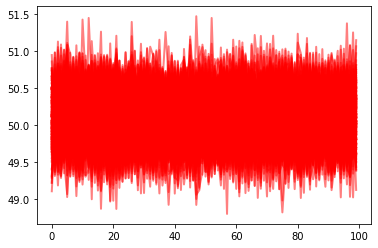

In [23]:
def ciplot(data):
    mu = np.mean(data)
    sigma = stats.sem(data,ddof=1)
    sample_size = len(data)
    x = np.linspace(min(data),max(data), num=sample_size)
    norm = np.random.normal(loc=sample_mean, scale=sample_std, size=(100, sample_size//10))
    low_CI_bound, high_CI_bound = stats.norm.interval(0.95, 
                            loc=np.mean(norm,0), scale=stats.sem(data))
    plt.plot(norm,color='r',linewidth=2.,alpha=0.7, label='estimated value')
    plt.plot(mu, color='b', label='grand truth')
    plt.fill_between(x, low_CI_bound, high_CI_bound, alpha=0.5,
                label='confidence interval')
    #plt.legend()
    plt.title('Confidence interval')
    plt.show()
ciplot(df['age'])

In [ ]:
# 正态分布下的置信区间
def norm_conf (data,confidence=0.95):
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
    sample_mean = np.mean(data)
    sample_std = np.std(data,ddof=1)
    sample_size = len(data)
    conf_intveral = stats.norm.interval(confidence, loc=sample_mean, scale=sample_std)
    return conf_intveral

In [ ]:
# T分布下的置信区间
def ttest_conf (data,confidence=0.95):
    sample_mean = np.mean(data)
    sample_std = np.std(data,ddof=1)
    sample_size = len(data)
    conf_intveral = stats.t.interval(confidence,df = (sample_size-1) , loc=sample_mean, scale=sample_std)
    return conf_intveral

In [12]:
#计算不同政治面貌收入的差异
gb = pd.concat([df['a10'],income],axis=1).groupby('a10')
ci(gb.get_group('群众').a8a.dropna())

obs.                                            1966
mean                                    32918.738555
std.eer.                                 1501.412944
ci          (29976.023258391644, 35861.453852493396)
dtype: object